# 对numpy矩阵的保存和读取

In [3]:
import numpy as np

# 点云地图点数
point_size = 160
# 训练集大小 暂设 10000
train_size = 10000
# 最低深度
min_depth = -5 
# 最高深度
max_depth = 10

np_save = np.random.randint(min_depth, max_depth, (train_size,point_size,point_size))
print(np_save.shape)

# np.save("test_x",np_save)


(10000, 160, 160)


## 参数设置 
生成（10000，32，32）的tile_map(训练集)

In [4]:
import numpy as np

# 任务深度
task_depth = 6
# 单元格 长和宽
cell_x = 5
cell_y = 5
# tile 索引
index_x = 0
index_y = 0
# 将实际地图信息转化为0，1二进制信息
tile_space = np.where(np_save > task_depth,1,0)
# np.sum(tile_space[0:cell_x,0:cell_y])
tile_grid = np.zeros([train_size ,int(point_size/cell_x),int(point_size/cell_y)],dtype = int)
summ = 0
# 将tile_grid按照一定规则转换
for t in range(0,train_size):
    for i in range(0,len(tile_grid[0])):
        for j in range(0,len(tile_grid[1])):
            tile_grid[t,i,j] = 1 if np.sum(tile_space[t,i * cell_x:i * cell_x + cell_x,j * cell_y:j*cell_y+cell_y]) > 0 else 0 
            if tile_grid[t,i,j] == 0:
                summ = summ + 1
np.save("test_x",tile_grid)
print(summ)

38807


## TEM的label

In [5]:
# 输出动作 [挖掘，上，下，左，右]

import numpy as np
"""
action_space_exc = [1,0,0,0,0]
action_space_up = [0,1,0,0,0]
action_space_down = [0,0,1,0,0]
action_space_left = [0,0,0,1,0]
action_space_right = [0,0,0,0,1]
"""
action_space_exc = 0
action_space_up = 1
action_space_down = 2
action_space_left = 3
action_space_right = 4

# 读取tile_grid
tile_grid = np.load('test_x.npy')
# 下一个动作标签
action_list_space = []
# 历史动作
history_action_list = []
chopped_map = tile_grid.copy()
#建立一个numpy shape(n,32,32)
chopped_map1 = np.ones((10000,32,32),dtype=int)
# TEM测试集
index_chop = 0
length_x = len(chopped_map[0])
length_y = len(chopped_map[1])
for i in range(0,train_size):
    index_x = 0
    index_y = 0
    action_list = []
    direct_bool = True
    while index_x < len(chopped_map[0]) and index_y < len(chopped_map[1]):
        if chopped_map[i,index_x,index_y] != 0:
            # 追加历史动作
            history_action_list.append(action_list[:])
            # 将动作加入动作标签
            action_list_space.append(action_space_exc)
            # 将地图加入chopped
            chopped_map1[index_chop] = chopped_map[i]
            index_chop = index_chop + 1
            # 将此坐标点化为 0
            chopped_map[i,index_x,index_y] = 0
            action_list.append(action_space_exc)

        if direct_bool:
            if index_x < length_y - 1:
                # 追加历史动作
                history_action_list.append(action_list[:])
                # 将动作加入动作标签
                action_list_space.append(action_space_right)
                # 将地图加入chopped
                chopped_map1[index_chop] = chopped_map[i]
                index_chop = index_chop + 1

                action_list.append(action_space_right)
                index_x = index_x + 1
            else:
                # 追加历史动作
                history_action_list.append(action_list[:])
                # 将动作加入动作标签
                action_list_space.append(action_space_down)
                # 将地图加入chopped
                chopped_map1[index_chop] = chopped_map[i]
                index_chop = index_chop + 1

                action_list.append(action_space_down)
                index_y = index_y + 1
                direct_bool = bool(1-direct_bool)
        else:
            if index_x > 0:

                # 追加历史动作
                history_action_list.append(action_list[:])
                # 将动作加入动作标签
                action_list_space.append(action_space_left)
                # 将地图加入chopped
                chopped_map1[index_chop] = chopped_map[i]
                index_chop = index_chop + 1

                action_list.append(action_space_left)
                index_x = index_x - 1
            else:

                # 追加历史动作
                history_action_list.append(action_list[:])
                # 将动作加入动作标签
                action_list_space.append(action_space_down)
                # 将地图加入chopped
                chopped_map1[index_chop] = chopped_map[i]
                index_chop = index_chop + 1

                action_list.append(action_space_down)
                index_y = index_y + 1
                direct_bool = bool(1-direct_bool)
    if i == 2:
        break
print(len(history_action_list))
print(chopped_map.shape)
print(chopped_map1[4000,:,:])
# print(history_action_list)
for i in range(len(history_action_list)):
    history_action_list[i] = history_action_list[i][-8:]
    if len(history_action_list[i]) < 8:
        history_action_list[i] = (8 - len(history_action_list[i])) * [0] + history_action_list[i]
    
print(action_list_space[:5])
print(history_action_list[:5])
# print(chopped_map[:5])



6129
(10000, 32, 32)
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]
[0, 4, 0, 4, 0]
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 4, 0, 4]]


In [23]:
import torch
import torch.nn as nn



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # input shape (1, 32, 32)
            nn.Conv2d(
                in_channels=1,      # input height
                out_channels=16,    # n_filters
                kernel_size=3,      # filter size
                stride=1,           # filter movement/step
                padding=1,      # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),      # output shape (16, 28, 28)
            nn.ReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),    # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(  # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 3, 1, 1),  # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(kernel_size=2),  # output shape (32, 7, 7)
        )
        self.out1 = nn.Linear(2056, 128)   # fully connected layer, output 10 classes
        self.out = nn.Linear(128, 128)
        self.test = nn.Linear(128,5)

    def forward(self, x,y):
        x = self.conv1(x)
        # print(x.shape)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)   # 展平多维的卷积图成 (batch_size, 32 * 7 * 7)
        #拼接步骤
        
        # print(x.shape)
        # print(y.shape)
        x = torch.cat([x,y],1)
        
        output = self.out1(x)
        output = self.out(output)
        output = self.test(output)
        return output



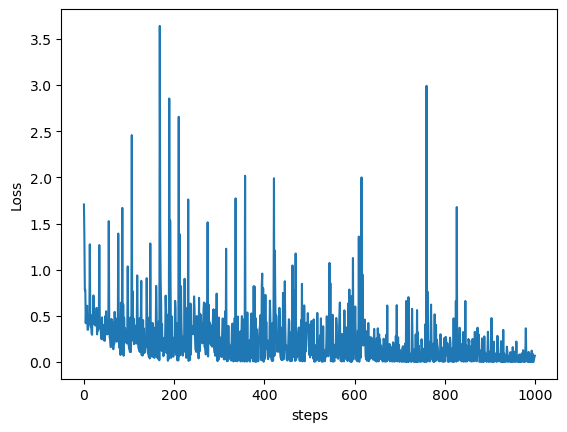

In [38]:
import matplotlib.pyplot as plt
EPOCH = 100
LR = 0.001          # 学习率

cnn = CNN()

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

s_ = np.expand_dims(chopped_map1[:6000], axis=1)
torch_data = torch.Tensor(s_)

# print(cnn(torch_data))

b_y = torch.LongTensor(history_action_list)

test_y = torch.LongTensor(action_list_space)

bacht_size = 20
losses = []
for epoch in range(EPOCH):
    for step in range(0,2040,bacht_size):   # 分配 batch data, normalize x when iterate train_loader
        output = cnn(torch_data[step:step+bacht_size],b_y[step:step+bacht_size])               # cnn output
        loss = loss_func(output, test_y[step:step+bacht_size])   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        if step % 100 == 0:
            losses.append(loss.item())
plt.plot(range(1000), losses[0:1000])
plt.xlabel('steps')
plt.ylabel('Loss')
plt.show()

In [14]:
from symbol import term

index_re = 20
start_i = 3000

test_output = cnn(torch_data[start_i:start_i+index_re],b_y[start_i:start_i+index_re])
print(test_output.shape)
# 输出一维最大值 纵坐标
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[start_i:start_i+index_re].numpy())

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1] because the unspecified dimension size -1 can be any value and is ambiguous

In [ ]:
goal = [
    # 在点云数据中需挖掘的区域
    [0,0],[0,160],[160,0],[160,160],
    # 挖掘任务深度
    [-5]
]